<a href="https://colab.research.google.com/github/PaavaniKohli/PRODIGY_ML_04/blob/main/Hand_Gesture_Paavani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Step 1: Upload kaggle.json
from google.colab import files
files.upload()  # choose your kaggle.json file

# Step 2: Move kaggle.json to correct folder
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('/content/kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 0o600)

# Step 3: Download the dataset from Kaggle
!kaggle datasets download -d gti-upm/leapgestrecog

# Step 4: Unzip into a folder
!unzip leapgestrecog.zip -d gesture_data

# Step 5: Set the data directory
data_dir = '/content/gesture_data'


Streaming output truncated to the last 5000 lines.
  inflating: gesture_data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: gesture_data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: gesture_data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: gesture_data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: gesture_data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: gesture_data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: gesture_data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: gesture_data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: gesture_data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: gesture_data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: gesture_data/leapgestrecog/leapGestRecog/07/06

In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(42)
tf.random.set_seed(42)

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

def load_and_preprocess_data(data_dir):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, validation_generator

def create_model(num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

data_dir = '/content/gesture_data/leapGestRecog'
train_generator, validation_generator = load_and_preprocess_data(data_dir)

num_classes = len(train_generator.class_indices)

model = create_model(num_classes)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

model.save('hand_gesture_model.h5')

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 652s 1s/step - accuracy: 0.8581 - loss: 0.4364 - val_accuracy: 0.6045 - val_loss: 1.8598
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 657s 1s/step - accuracy: 0.9890 - loss: 0.0196 - val_accuracy: 0.7023 - val_loss: 1.4222
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 647s 1s/step - accuracy: 0.9897 - loss: 0.0171 - val_accuracy: 0.6900 - val_loss: 1.4586
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 636s 1s/step - accuracy: 0.9879 - loss: 0.0208 - val_accuracy: 0.6675 - val_loss: 1.5886
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 638s 1s/step - accuracy: 0.9903 - loss: 0.0163 - val_accuracy: 0.6530 - val_loss: 1.3641
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 662s 1s/step - accuracy: 0.9891 - loss: 0.0236 - val_accuracy: 0.8210 - val_loss: 1.0111
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 664s 1s/step - accuracy: 0.9871 - loss: 0.0182 - val_accuracy: 0.8130 - val_loss: 0.9825
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 595s 1s/step - accuracy: 0.9912 - loss: 0.0139 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


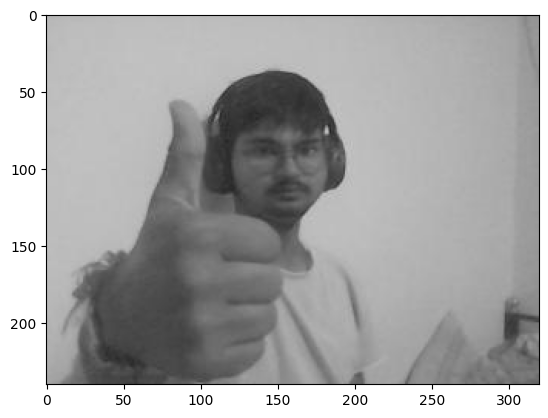

The predicted hand gesture is: Thumb


In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image
from skimage.io import imread
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('hand_gesture_model.h5')

class_labels = [
    'Palm', 'L', 'Fist', 'Fist_moved', 'Thumb',
    '', 'OK', 'Palm_moved', 'C', 'Down'
]

def predict_hand_gesture(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    predicted_gesture = class_labels[predicted_class]
    return predicted_gesture

image_path_to_predict = '/content/drive/MyDrive/image_pre/thumb_processed.jpg'
predicted_gesture = predict_hand_gesture(image_path_to_predict)

img=imread(image_path_to_predict)
plt.imshow(img)
plt.show()

print(f"The predicted hand gesture is: {predicted_gesture}")